In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append("/Users/yohei.moriya/src/")
import rakus_ml_training as rmt

/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/yohei.moriya/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


load success rakus_ml_training


In [2]:
#  データセット読み込み
df_train_origin = rmt.boston.get_train_data()
df_test_origin = rmt.boston.get_test_data()
display(df_train_origin.head())
display(df_train_origin.describe().T)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1


,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.688243,9.135386,0.00632,0.08265,0.23912,3.56868,88.9762
ZN,405.0,11.498765,23.266496,0.00000,0.00000,0.00000,20.00000,100.0000
INDUS,405.0,11.094840,6.848826,0.46000,5.19000,9.69000,18.10000,27.7400
CHAS,405.0,0.079012,0.270092,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,405.0,0.553488,0.117119,0.38500,0.44800,0.53800,0.62400,0.8710
RM,405.0,6.269326,0.688459,3.56100,5.87700,6.18200,6.62500,8.7800
AGE,405.0,68.014815,28.572272,2.90000,43.40000,76.90000,93.90000,100.0000
DIS,405.0,3.821548,2.120361,1.12960,2.10070,3.27970,5.11800,12.1265
RAD,405.0,9.506173,8.699498,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,405.0,403.906173,169.325237,187.00000,277.00000,329.00000,666.00000,711.0000


In [7]:
def fit(vec_x, vec_w):
    """
    線形回帰のモデルを組み立てて値を返します。
    """
    if vec_x.shape[1] != vec_w.shape[0] :
        print(f"vec_x : {vec_x.shape}, vec_w : {vec_w.shape}")
        raise Exception('引数が不正です。')
        
    vec_y = vec_x.dot(vec_w.T)
    return vec_y


def cal_error(vec_y, vec_t):
    """
    出力の誤差を計算します
    """
    if vec_y.shape[0] != vec_t.shape[0]:
        print(f"vec_y : {vec_y.shape} , vec_t : {vec_t.shape}")
        raise Exception('引数が不正です。')
    vec_dev = vec_y - vec_t
    error = np.sqrt((np.mean(vec_dev ** 2)) / 2)
    return -error


def cal_derror(vec_x, vec_w, vec_t):
    """
    誤差の勾配を計算します。
    """
    if vec_x.shape[1] != vec_w.shape[0] and vec_x.shape[0] != vec_t[0]:
        print(f"vec_x : {vec_x.shape} , vec_w : {vec_w.shape} , vec_t : {vec_t.shape}")
        raise Exception('引数が不正です。')
    
    vec_y = fit(vec_x, vec_w)
    vec_dev = vec_y - vec_t
    vec_dcost = []
    for index_x in range(vec_x.shape[1]):
        vec_dcost.append(vec_dev * vec_x[:, index_x])

    return 2 * np.mean(np.array(vec_dcost), axis=1)


def train(vec_x, vec_w, vec_t, alpha):
    """
    ハイパーパラメータを更新します。
    """
    vec_item = cal_derror(vec_x, vec_w, vec_t) * alpha
    vec_re_w = vec_w - vec_item
    return vec_re_w


def norm(df_origin):
    """
    行列を正規化します。
    """
    vec_mean = df_origin.mean()
    vec_var = df_origin.var()
    nd_train = df_origin.values
    nd_norm = (nd_train - vec_mean.values) / np.sqrt(vec_var).values
    return pd.DataFrame(data=nd_norm, columns=df_origin.columns, index=df_origin.index)


def square(df_origin):
    """
    行列の二乗を計算します
    """
    df_origin_sq = df_origin ** 2
    df_origin_sq = df_origin_sq.rename(columns=lambda name: name + "^2")
    return df_origin_sq


def cube(df_origin):
    """
    行列の二乗を計算します
    """
    df_origin_cube = df_origin ** 3
    df_origin_cube = df_origin_cube.rename(columns=lambda name: name + "^3")
    return df_origin_cube


def do_cleansing(df_train, df_test):
    """
    入力されたデータを結合し、まとめて前処理を実行します。
    前処理が終了すると、元のindex番号を基準にして、データフレームを分割することで、データ集合を復元します。
    """
    if df_train.shape[1] != df_test.shape[1]:
        raise Exception('入力されたデータの特徴量数が一致しません')
    
    index_train = df_train.index.tolist()
    index_test = df_test.index.tolist()
    df_all = pd.concat([df_train, df_test])
    
    df_all_clean = df_all.copy()
    
    """
    前処理を列挙する
    """
    # -----------------------------------------------------------------------------------------     
    # 特徴量の２乗と3乗を計算
    df_all_clean = pd.concat([df_all_clean, square(df_all_clean), cube(df_all_clean)], axis=1)

    # 標準化
    df_all_clean = norm(df_all_clean)
    # -----------------------------------------------------------------------------------------
    
    #  もとのデータに分割し直す
    df_train_clean = df_all_clean.iloc[:df_train.shape[0], :]
    df_test_clean = df_all_clean.iloc[df_train.shape[0]:, :]
    
    if df_train_clean.shape[0] == df_train.shape[0]:
        return df_train_clean, df_test_clean
    else:
        print(f"{df_train_clean.shape[0]}, {df_train.shape[0]}")
        raise Exception('前処理した結果データの数に不整合が生じたようです。')


def run(df_train, df_label, count):
    """
    線形回帰を実行します。

    :param df_origin:
    :return:
    """
    nd_train = df_train.values
    nd_label = df_label.values
    
    vec_w = np.zeros(nd_train.shape[1])
    
    prev_error = 0
    errors = []
    
    for i in range(count):
        vec_w = train(nd_train, vec_w, nd_label, 0.01)
        y = fit(nd_train, vec_w)
        error = cal_error(y, df_label.values)
        errors.append(error)
        if np.abs(prev_error - error) < 0.0001:
            break
        prev_error = error

    return vec_w, errors

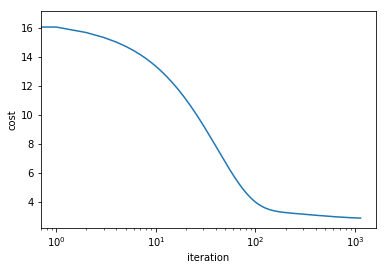

result : False
score: 0.7786350460002667


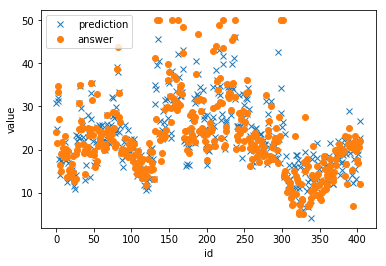

In [9]:
def main():
    
    # 　データの読み込み
    df_test_origin = rmt.boston.get_test_data()
    df_train_origin = rmt.boston.get_train_data()
    
    #  データの前処理
    df_train = df_train_origin.drop('TARGET', axis=1)
    df_test = df_test_origin
    df_label = df_train_origin['TARGET']
    df_train_clean, df_test_clean = do_cleansing(df_train.copy(), df_test.copy())
    df_train_clean['BIAS'] = 1
    df_test_clean['BIAS'] = 1
    
    #  学習の実行
    vec_w, errors = run(df_train_clean, df_label, 10000)
    plt.xlabel('iteration')
    plt.ylabel('cost')
    plt.xscale('log')
    plt.plot(np.abs(errors))
    plt.show()
    
    nd_fit_train = fit(vec_w=vec_w, vec_x=df_train_clean.values)
    plt.xlabel('id')
    plt.ylabel('value')
    plt.plot(nd_fit_train, marker = 'x', label = 'prediction', linestyle = 'None')
    plt.plot(df_label.values, marker = 'o', label = 'answer', linestyle = 'None')
    plt.legend(loc='upper left')

    # 　学習の評価
    nd_result = fit(vec_w=vec_w, vec_x=df_test_clean.values)
    df_result = pd.DataFrame(data=nd_result, columns=['TARGET'])
    rmt.boston.confirm(df_result)

main()